In [1]:
import pandas as pd


In [2]:
#Importando dados
dados = pd.read_csv('Base_v2.csv', sep = ';', error_bad_lines=False, index_col=False, dtype='unicode')


In [3]:
dados.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,SG_UF_ESC,NO_MUNICIPIO_ESC,TP_ENSINO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,190001746144,GO,Goiânia,64,F,1,3,1,1,NaN,NaN,NaN,0,0,0,0,0,0
1,190001029147,PA,Belém,26,F,0,3,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,190001177099,TO,Palmas,26,F,1,1,1,1,NaN,NaN,1,0,0,0,0,0,0
3,190001482406,PE,Jaboatão dos Guararapes,27,F,2,3,1,1,NaN,NaN,1,120,120,120,120,80,560
4,190001595933,SP,Cafelândia,21,F,1,1,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#ajustando os dados análise
dados['NU_NOTA_COMP1'] = dados['NU_NOTA_COMP1'].astype(float).fillna(0)
dados['NU_NOTA_COMP2'] = dados['NU_NOTA_COMP2'].astype(float).fillna(0)
dados['NU_NOTA_COMP3'] = dados['NU_NOTA_COMP3'].astype(float).fillna(0)
dados['NU_NOTA_COMP4'] = dados['NU_NOTA_COMP4'].astype(float).fillna(0)
dados['NU_NOTA_COMP5'] = dados['NU_NOTA_COMP5'].astype(float).fillna(0)
dados['NU_NOTA_REDACAO'] = dados['NU_NOTA_REDACAO'].astype(float).fillna(0)
dados['TP_SEXO'] = dados['TP_SEXO'].fillna(0)
dados['TP_ENSINO'] = dados['TP_ENSINO'].fillna(0)
dados['SG_UF_ESC'] = dados['SG_UF_ESC'].fillna(0)
dados['NO_MUNICIPIO_ESC'] = dados['NO_MUNICIPIO_ESC'].fillna(0)
dados.head()

,NU_INSCRICAO,SG_UF_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,SG_UF_ESC,NO_MUNICIPIO_ESC,TP_ENSINO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,190001746144,GO,Goiânia,64,F,1,3,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,190001029147,PA,Belém,26,F,0,3,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,190001177099,TO,Palmas,26,F,1,1,1,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
3,190001482406,PE,Jaboatão dos Guararapes,27,F,2,3,1,1,0,0,1,120.0,120.0,120.0,80.0,80.0,560.0
4,190001595933,SP,Cafelândia,21,F,1,1,1,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
#média dos dados
dados['NU_NOTA_COMP1'].mean()


92.76275339177182

In [40]:
grupo = dados.groupby('TP_SEXO')

In [41]:
grupo.groups

{0: [5095270, 5095271], 'F': [0, 1, 2, 3, 4, 5, 6, 8, 12, 13, 15, 16, 18, 20, 23, 24, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 39, 42, 51, 53, 54, 56, 57, 58, 59, 60, 61, 64, 66, 67, 68, 69, 71, 72, 75, 81, 82, 83, 85, 87, 89, 91, 92, 93, 96, 97, 98, 99, 100, 102, 103, 105, 107, 109, 110, 111, 114, 115, 117, 118, 119, 121, 123, 125, 127, 131, 134, 136, 137, 138, 141, 142, 143, 148, 149, 151, 153, 155, 156, 157, 158, 159, 162, 163, 165, 166, 170, 172, 173, ...], 'M': [7, 9, 10, 11, 14, 17, 19, 21, 22, 25, 33, 38, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 52, 55, 62, 63, 65, 70, 73, 74, 76, 77, 78, 79, 80, 84, 86, 88, 90, 94, 95, 101, 104, 106, 108, 112, 113, 116, 120, 122, 124, 126, 128, 129, 130, 132, 133, 135, 139, 140, 144, 145, 146, 147, 150, 152, 154, 160, 161, 164, 167, 168, 169, 171, 174, 176, 177, 179, 183, 186, 188, 189, 196, 198, 202, 206, 210, 212, 214, 216, 218, 219, 221, 226, 227, 228, 229, 231, 232, 239, ...]}

In [42]:
#Analise 
grupo['TP_SEXO'].describe().round(2)

,count,unique,top,freq
TP_SEXO,,,,
0,2,1,0,2
F,3031822,1,F,3031822
M,2063448,1,M,2063448


In [8]:
#Seleções e Frequências
#Seleção somente dos dados Femininos
selecao_feminino = dados['TP_SEXO'] == 'F'
freq_feminino = dados[selecao_feminino].shape[0]
freq_feminino

#Seleções e Frequências
#Seleção somente dos dados Masculinos
selecao_masculino = dados['TP_SEXO'] == 'M'
freq_masculino = dados[selecao_masculino].shape[0]
freq_masculino

2063448

In [9]:
grupo['NU_NOTA_COMP1'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
TP_SEXO,,,,,,,,
0,2.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
F,3031822.0,94.41,59.01,0.0,0.0,120.0,140.0,200.0
M,2063448.0,90.34,57.85,0.0,0.0,120.0,120.0,200.0


In [10]:
grupo['NU_NOTA_COMP1'].aggregate(['count', 'min', 'max', 'mean']).rename(columns = {'count': 'Quantidade', 'min':'Minimo', 'max' : 'Máximo', 'mean' : 'Média'})

,Quantidade,Minimo,Máximo,Média
TP_SEXO,,,,
0,2,0.0,0.0,0.000000
F,3031822,0.0,200.0,94.414672
M,2063448,0.0,200.0,90.335681


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))


Text(0.5, 1.0, 'Valor da Nota Complementar 1 por Sexo')

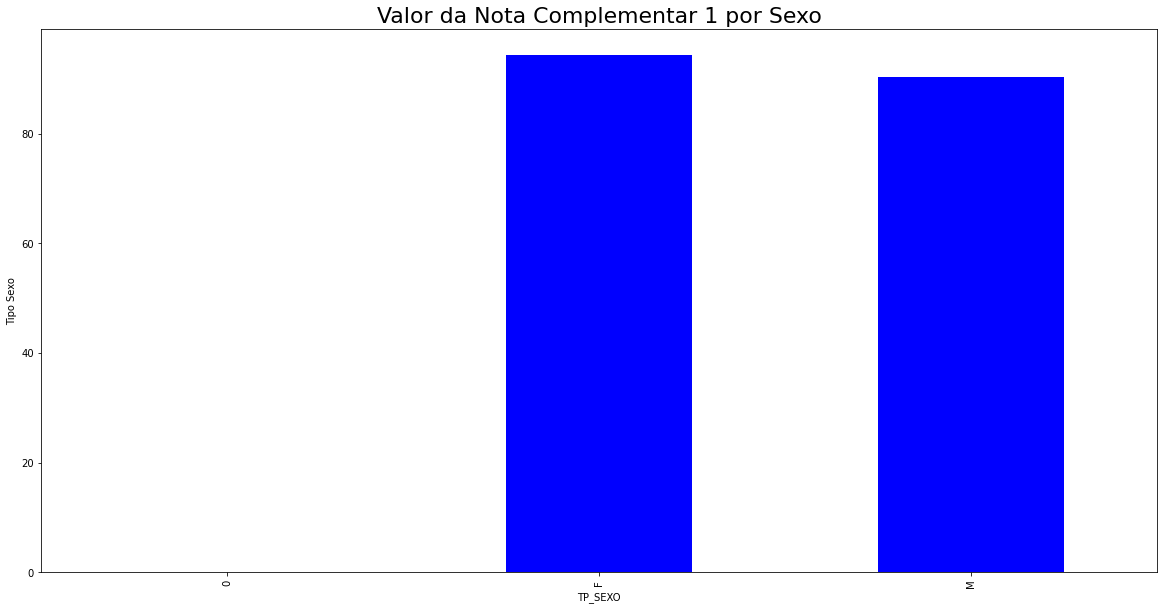

In [21]:
fig = grupo['NU_NOTA_COMP1'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Tipo Sexo')
fig.set_title('Valor da Nota Complementar 1 por Sexo',{'fontsize':22})



In [23]:
grupo_UF = dados.groupby('SG_UF_RESIDENCIA')

In [25]:
grupo_UF['NU_NOTA_COMP1'].aggregate(['count', 'min', 'max', 'mean']).rename(columns = {'count': 'Quantidade', 'min':'Minimo', 'max' : 'Máximo', 'mean' : 'Média'})

,Quantidade,Minimo,Máximo,Média
SG_UF_RESIDENCIA,,,,
AC,38229,0.0,200.0,87.642889
AL,91707,0.0,200.0,91.696381
AM,118087,0.0,200.0,78.148992
AP,42140,0.0,200.0,86.551495
BA,398095,0.0,200.0,89.683869
CE,295870,0.0,200.0,92.251124
DF,94352,0.0,200.0,93.207563
ES,102435,0.0,200.0,92.347733
GO,170147,0.0,200.0,93.153097


Text(0.5, 1.0, 'Média - Nota Complementar 1 por Sexo')

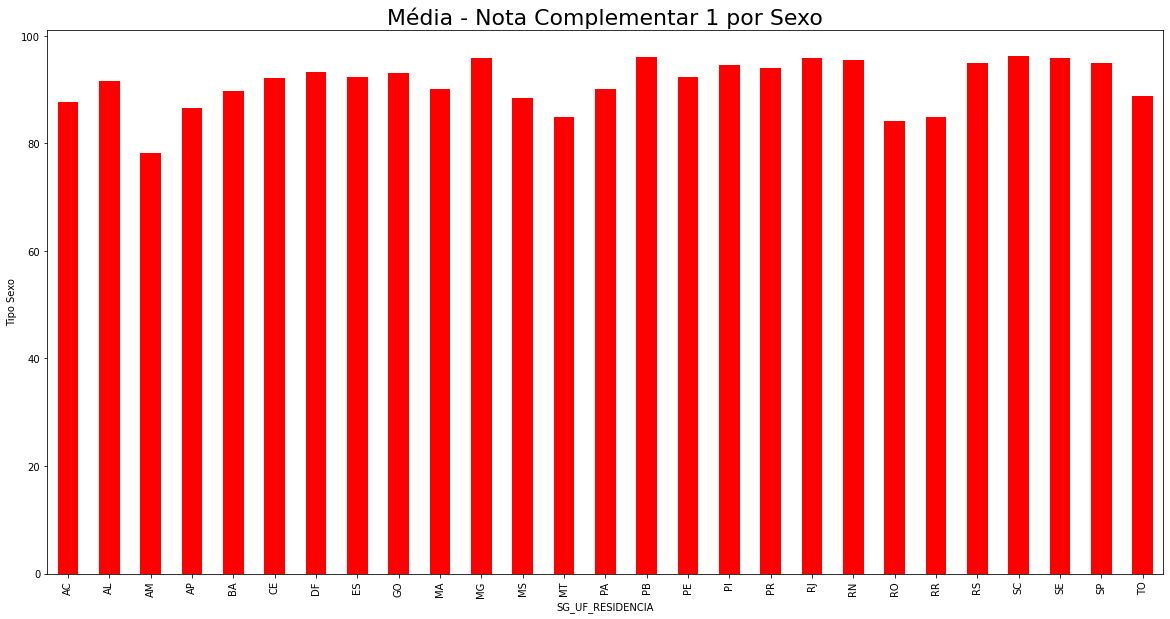

In [31]:
fig = grupo_UF['NU_NOTA_COMP1'].mean().plot.bar(color = 'red')
fig.set_ylabel('Tipo Sexo')
fig.set_title('Média - Nota Complementar 1 por Sexo',{'fontsize':22})


Text(0.5, 1.0, 'Desvio Padrão -  Nota Complementar 1 por Sexo')

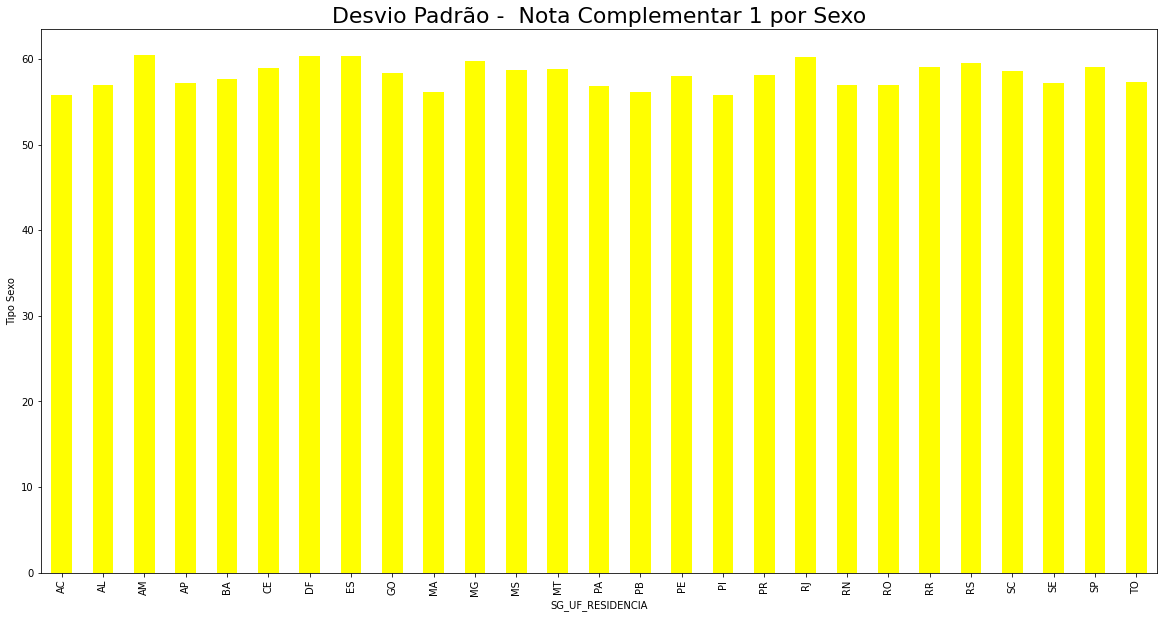

In [32]:
fig = grupo_UF['NU_NOTA_COMP1'].std().plot.bar(color = 'yellow')
fig.set_ylabel('Tipo Sexo')
fig.set_title('Desvio Padrão -  Nota Complementar 1 por Sexo',{'fontsize':22})

In [ ]:
df.groupby(['Pclass', 'Sex']).mean()

In [16]:
uf_sul = ['RS', 'SC', 'PR']
uf_sudeste = ['SP', 'RJ', 'ES', 'MG']
uf_nordeste = ['BA', 'SE', 'AL','PE','PB','RN', 'CE', 'PI', 'MA']
uf_centro_oeste = ['MT', 'MS', 'GO','DF']
uf_norte = ['TO','PA','AM','AP','AC','RO','RR']

In [17]:
dados_sul = dados[dados['SG_UF_RESIDENCIA'].isin(uf_sul)]
dados_sul

,NU_INSCRICAO,SG_UF_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,SG_UF_ESC,NO_MUNICIPIO_ESC,TP_ENSINO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
7,190001871247,PR,Cascavel,20,M,1,3,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
14,190001871248,PR,Foz do Iguaçu,30,M,1,1,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
22,190001871249,PR,Curitiba,35,M,1,1,1,1,0,0,0,140.0,180.0,140.0,160.0,160.0,740.0
26,190001698277,SC,Criciúma,18,F,1,1,1,1,0,0,0,160.0,140.0,160.0,100.0,100.0,720.0
38,190001720508,RS,Estação,23,M,1,1,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095230,190005962347,RS,Santa Vitória do Palmar,21,F,1,2,1,1,0,0,1,100.0,120.0,80.0,20.0,20.0,420.0
5095253,190005911853,PR,Palmas,16,F,1,1,1,1,0,0,0,120.0,120.0,120.0,60.0,60.0,520.0
5095255,190005912942,SC,Florianópolis,20,F,1,1,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5095258,190005911854,PR,Curitiba,16,M,0,1,1,1,0,0,0,120.0,120.0,120.0,160.0,160.0,640.0


In [18]:
dados_sudeste = dados[dados['SG_UF_RESIDENCIA'].isin(uf_sudeste)]
dados_sudeste

,NU_INSCRICAO,SG_UF_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,SG_UF_ESC,NO_MUNICIPIO_ESC,TP_ENSINO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
4,190001595933,SP,Cafelândia,21,F,1,1,1,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
8,190001595934,SP,Guarulhos,17,F,1,3,1,2,SP,Guarulhos,1,100.0,120.0,120.0,80.0,80.0,540.0
10,190001595935,SP,Sertãozinho,23,M,1,3,1,1,0,0,0,120.0,120.0,100.0,120.0,120.0,600.0
12,190001595936,SP,Itapevi,19,F,1,3,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
13,190001259508,MG,São João del Rei,18,F,1,4,1,1,0,0,0,100.0,40.0,40.0,40.0,40.0,340.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095257,190005795014,MG,Padre Paraíso,20,M,2,1,1,1,0,0,1,160.0,160.0,120.0,40.0,40.0,620.0
5095259,190005872270,SP,São Paulo,33,F,1,0,1,1,0,0,1,120.0,160.0,120.0,80.0,80.0,600.0
5095263,190005795015,MG,Pedro Leopoldo,26,M,1,3,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5095267,190005795016,MG,Monte Carmelo,25,F,2,1,1,1,0,0,0,80.0,40.0,40.0,0.0,0.0,240.0


In [19]:
dados_nordeste = dados[dados['SG_UF_RESIDENCIA'].isin(uf_nordeste)]
dados_nordeste

,NU_INSCRICAO,SG_UF_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,SG_UF_ESC,NO_MUNICIPIO_ESC,TP_ENSINO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
3,190001482406,PE,Jaboatão dos Guararapes,27,F,2,3,1,1,0,0,1,120.0,120.0,120.0,80.0,80.0,560.0
18,190001482407,PE,Jaboatão dos Guararapes,17,F,1,1,1,2,PE,Recife,1,160.0,200.0,180.0,180.0,180.0,880.0
19,190001199979,MA,São Luís,49,M,1,1,1,1,0,0,0,120.0,120.0,120.0,60.0,60.0,540.0
31,190001480518,PB,Nova Floresta,18,F,1,3,1,2,PB,Cuité,1,120.0,120.0,120.0,0.0,0.0,480.0
36,190001480519,PB,João Pessoa,18,F,1,1,1,1,0,0,1,160.0,140.0,200.0,160.0,160.0,840.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095252,190005574210,PB,São José de Piranhas,23,M,1,3,1,1,0,0,1,120.0,180.0,140.0,100.0,100.0,680.0
5095260,190005749000,BA,Oliveira dos Brejinhos,30,F,1,2,1,1,0,0,0,160.0,120.0,140.0,100.0,100.0,640.0
5095262,190005613633,PE,Santa Cruz do Capibaribe,25,F,1,1,1,1,0,0,0,120.0,140.0,120.0,80.0,80.0,600.0
5095264,190005562526,RN,Natal,51,F,3,3,1,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
dados_centro_oeste = dados[dados['SG_UF_RESIDENCIA'].isin(uf_centro_oeste)]
dados_centro_oeste

,NU_INSCRICAO,SG_UF_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,SG_UF_ESC,NO_MUNICIPIO_ESC,TP_ENSINO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,190001746144,GO,Goiânia,64,F,1,3,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,190001754084,MS,Campo Grande,23,F,1,3,1,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
11,190001746145,GO,Aparecida de Goiânia,23,M,1,3,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
32,190001746146,GO,Aparecida de Goiânia,23,F,1,3,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
84,190001782198,MT,Rondonópolis,37,M,2,2,1,1,0,0,0,160.0,200.0,180.0,80.0,80.0,800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095203,190006054346,DF,Brasília,28,M,1,1,1,1,0,0,0,160.0,200.0,160.0,160.0,160.0,880.0
5095208,190006054347,DF,Brasília,36,F,2,3,1,1,0,0,0,120.0,120.0,120.0,0.0,0.0,440.0
5095244,190006021684,MT,Sinop,17,F,1,3,1,1,0,0,0,140.0,120.0,120.0,0.0,0.0,500.0
5095245,190005972854,MS,Campo Grande,22,M,1,3,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
dados_norte = dados[dados['SG_UF_RESIDENCIA'].isin(uf_norte)]
dados_norte

,NU_INSCRICAO,SG_UF_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,SG_UF_ESC,NO_MUNICIPIO_ESC,TP_ENSINO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
1,190001029147,PA,Belém,26,F,0,3,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,190001177099,TO,Palmas,26,F,1,1,1,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
6,190001027149,RO,Buritis,27,F,2,3,1,1,0,0,1,120.0,120.0,160.0,100.0,100.0,620.0
9,190001029148,PA,Belém,20,M,1,3,1,1,0,0,2,120.0,160.0,140.0,180.0,180.0,720.0
23,190001029149,PA,Belém,29,F,2,3,1,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095248,190005467754,RO,São Miguel do Guaporé,19,F,1,1,1,2,RO,São Miguel do Guaporé,1,100.0,40.0,40.0,40.0,40.0,340.0
5095254,190005402416,AM,Manaus,24,M,1,1,1,1,0,0,0,140.0,120.0,140.0,100.0,100.0,620.0
5095256,190005549705,AP,Macapá,25,M,1,3,1,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
5095261,190005402417,AM,Manaus,19,M,1,1,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# Agrupa por Pclass e Sex e calcula a média de cada grupo

df_media_norte = dados_norte.loc[dados_norte['NU_NOTA_COMP1'] >= 0,['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO']].sum(axis=1).mean()
df_media_norte

786.047343264545

In [50]:
# Agrupa por Pclass e Sex e calcula a média de cada grupo

df_media_sul = dados_sul.loc[dados_sul['NU_NOTA_COMP1'] >= 0,['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO']].sum(axis=1).mean()
df_media_sul

855.7761563866424

In [51]:
df_media_sudeste = dados_sudeste.loc[dados_sudeste['NU_NOTA_COMP1'] >= 0,['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO']].sum(axis=1).mean()
df_media_sudeste

884.4857184110049

In [52]:
df_media_nordeste = dados_nordeste.loc[dados_nordeste['NU_NOTA_COMP1'] >= 0,['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO']].sum(axis=1).mean()
df_media_nordeste

857.4419722624743

In [53]:
df_media_centro_oeste = dados_centro_oeste.loc[dados_centro_oeste['NU_NOTA_COMP1'] >= 0,['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO']].sum(axis=1).mean()
df_media_centro_oeste

833.5361047741752

In [59]:
m = pd.merge(df_media_centro_oeste, df_media_nordeste, how = 'outer', on = '')

SyntaxError: positional argument follows keyword argument (<ipython-input-59-5e84e9a3a840>, line 1)

In [60]:
df_media_centro_oeste

833.5361047741752